In [22]:
!pip install pykrige

**Bibliotecas:**

In [3]:
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Lectura de archivos:**

In [6]:
df = pd.read_csv("datospyth.csv")

In [7]:
df.head(1)

,pm25_df,pm25_nova,pm10_df,pm10_nova,temperatura,humedad_relativa,latitud,longitud,assigned_second
0,36.101854,29.725442,60.597082,49.135072,21.28,79.67,6.157203,-75.601693,0.0


**Información básica de los datos**

In [8]:
print("Número de datos:", df['pm25_df'].shape)

Número de datos: (100,)


In [9]:
print("Time_min:", df["assigned_second"].min(), "Time_max:", df["assigned_second"].max(), "pm25_min:", df["pm25_df"].min(), "pm25_max:", df["pm25_df"].max(), "hmd_min:", df["humedad_relativa"].min(), "hmd_max:", df["humedad_relativa"].max(), "tmp_min:", df["temperatura"].min(), "tmp_max:", df["temperatura"].max())

Time_min: 0.0 Time_max: 5940.0 pm25_min: 27.118931821799997 pm25_max: 36.1018536463 hmd_min: 79.67 hmd_max: 83.0 tmp_min: 21.02 tmp_max: 21.28


**Convertir a matrices np**

In [10]:
x   = np.array(df["assigned_second"])
y   = np.array(df["humedad_relativa"])
val = np.array(df["pm25_df"])
z = np.array(df["temperatura"])

**Gráficas:**

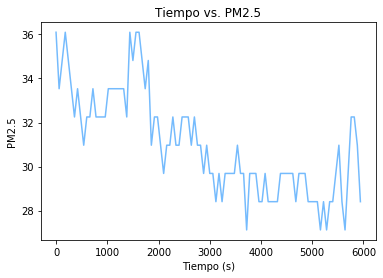

In [11]:
plt.plot (x, val, "", color='xkcd:sky blue')
plt.title("Tiempo vs. PM2.5")
plt.xlabel("Tiempo (s)")
plt.ylabel("PM2.5")
plt.show ()

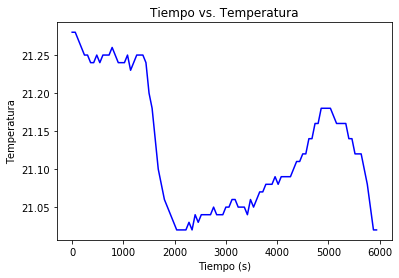

In [12]:
plt.plot (x, z, "", color='blue')
plt.title("Tiempo vs. Temperatura")
plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura")
plt.show ()

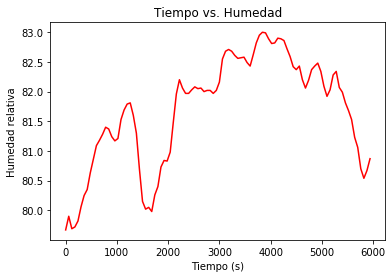

In [13]:
plt.plot (x, y, "", color='red')
plt.title("Tiempo vs. Humedad")
plt.xlabel("Tiempo (s)")
plt.ylabel("Humedad relativa")
plt.show ()

**Variograma:**

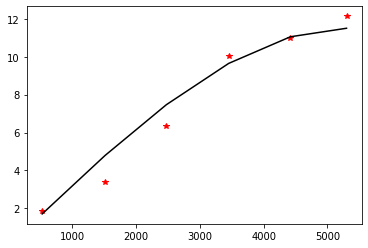

In [14]:
OK = OrdinaryKriging(x, y, val, variogram_model='spherical',
                     verbose=False, enable_plotting=True)

**Grid set:**

In [15]:
ok3d.variogram_function?

Object `ok3d.variogram_function` not found.


In [16]:
gridx= np.linspace(0, 6000, num=600, endpoint=False)
gridy= np.linspace(0, 30, num=3, endpoint=False)
gridz= np.linspace(0, 30, num=3, endpoint=False)

In [17]:
gridz

array([ 0., 10., 20.])

In [18]:
z, ss = OK.execute('grid', gridx, gridy)

In [66]:
kt.write_asc_grid(gridx, gridy, z, filename="output.asc")